Epoch 0, Loss: 0.3416566429432655
Epoch 1000, Loss: 0.24948175732436767
Epoch 2000, Loss: 0.2491763620580877
Epoch 3000, Loss: 0.24899343991413664
Epoch 4000, Loss: 0.24876939959305955
Epoch 5000, Loss: 0.24848936060372212
Epoch 6000, Loss: 0.2481332390019355
Epoch 7000, Loss: 0.2476737771264237
Epoch 8000, Loss: 0.24707426482361322
Epoch 9000, Loss: 0.2462861660522024
Epoch 10000, Loss: 0.24524737934874677


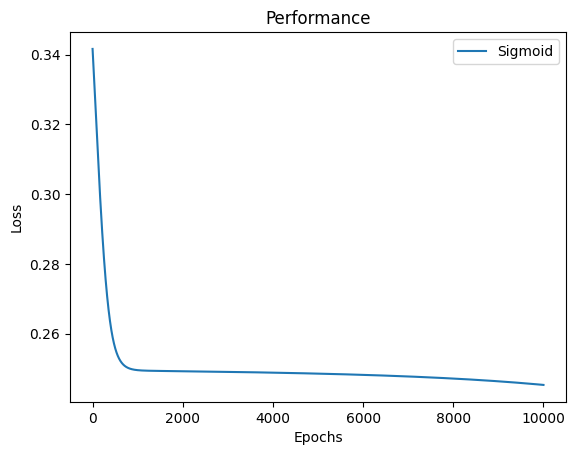

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

def forward_propagation(inputs, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    return hidden_layer_output, output_layer_output

def calculate_loss(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                         weights_input_hidden, weights_hidden_output, learning_rate):
    output_error = targets - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate

def train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs):
    input_size = inputs.shape[1]
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)
    loss_history =[]
    for epoch in range(epochs+1):
        # Forward Propagation
        hidden_layer_output, output_layer_output = forward_propagation(inputs, weights_input_hidden, weights_hidden_output)

        # Backward Propagation
        backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                             weights_input_hidden, weights_hidden_output, learning_rate)

        # Calculate and print loss
        loss = calculate_loss(targets, output_layer_output)
        loss_history.append(loss)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights_input_hidden, weights_hidden_output,loss_history

# Example usage
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 10000

trained_weights_input_hidden, trained_weights_hidden_output,loss_history = train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs)

plt.plot(loss_history,label="Sigmoid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Performance")
plt.legend()
plt.show()